<a href="https://colab.research.google.com/github/arizky012/DataCompression-Class/blob/master/Nomor_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np
import scipy
import matplotlib.pyplot as plt
import huffman
from scipy.fftpack import dct, idct

In [0]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )
  
def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

image

In [0]:
im = np.array( [
      [1,8,219,51,69,171,81,41],
      [94,108,20,121,17,214,15,74],
      [233,93,197,83,177,215,183,78],
      [41,84,118,62,210,71,122,38],
      [222,73,197,248,125,226,210,5],
      [35,36,127,5,151,2,197,165],
      [196,180,142,52,173,151,243,164],
      [254,62,172,75,21,196,126,224]
      ])

Entropy Coding

In [115]:
pip install huffman

In [123]:
huffman.codebook([('0,1',17),('0,2',13),('0,3',6),('0,4',2),('2,1',3),('1,2',2),('1,1',3),('1,3',1),('4,2',1),('0,0',1)])

{'0,0': '00110',
 '0,1': '11',
 '0,2': '10',
 '0,3': '011',
 '0,4': '0010',
 '1,1': '0100',
 '1,2': '0001',
 '1,3': '0000',
 '2,1': '0101',
 '4,2': '00111'}

# Encode

In [0]:
g = im.copy()

convert to [-128,127]

In [0]:

for x in range(8):
  for y in range(8):
    g[x,y] = im[x,y]-128

In [98]:
g

array([[-127, -120,   91,  -77,  -59,   43,  -47,  -87],
       [ -34,  -20, -108,   -7, -111,   86, -113,  -54],
       [ 105,  -35,   69,  -45,   49,   87,   55,  -50],
       [ -87,  -44,  -10,  -66,   82,  -57,   -6,  -90],
       [  94,  -55,   69,  120,   -3,   98,   82, -123],
       [ -93,  -92,   -1, -123,   23, -126,   69,   37],
       [  68,   52,   14,  -76,   45,   23,  115,   36],
       [ 126,  -66,   44,  -53, -107,   68,   -2,   96]])

DCT

In [0]:
G = dct2(g)

In [0]:
for x in range(8):
  for y in range(8):
    G[x,y] = round(G[x,y],2)

In [101]:
G

array([[ -53.5 ,  -42.37,   -4.99,   94.09,  -94.25,   82.58,  115.99,
          96.96],
       [-144.74,   30.63, -165.94,   22.53,  -55.09,  -26.76,   45.39,
         -76.5 ],
       [ -46.77,  -28.71,  113.62,  -40.93,  -28.33,  -39.12,  131.28,
         -87.92],
       [ -88.67,  -60.13,  -70.12,  -84.05,  -38.84,   18.38,  -54.63,
          53.37],
       [ -14.75,   32.48,  -88.16,  -27.56,  -18.  ,   72.99,   76.57,
         -12.66],
       [  -1.06,  -37.05,  -19.76,  -24.91,  -41.49,  -91.99,  -76.61,
         171.35],
       [ -16.89,  -47.45,   24.28,  -56.94,   -0.44,   20.51,   59.88,
         133.33],
       [ 222.41,   79.21,  -18.53,   92.78,  -46.48,  123.71,   58.15,
         -18.58]])

In [102]:
for x in range(8):
  for y in range(8):
    print("%.2f"%G[x,y], end = "\t")
  print()

-53.50	-42.37	-4.99	94.09	-94.25	82.58	115.99	96.96	
-144.74	30.63	-165.94	22.53	-55.09	-26.76	45.39	-76.50	
-46.77	-28.71	113.62	-40.93	-28.33	-39.12	131.28	-87.92	
-88.67	-60.13	-70.12	-84.05	-38.84	18.38	-54.63	53.37	
-14.75	32.48	-88.16	-27.56	-18.00	72.99	76.57	-12.66	
-1.06	-37.05	-19.76	-24.91	-41.49	-91.99	-76.61	171.35	
-16.89	-47.45	24.28	-56.94	-0.44	20.51	59.88	133.33	
222.41	79.21	-18.53	92.78	-46.48	123.71	58.15	-18.58	


Quantitas matrix ( quality 50% jpg)

In [0]:
Q = np.array([[16,11,10,16,24,40,51,61],
             [12,12,14,10,26,58,60,55],
             [14,13,16,24,40,57,69,56],
             [14,17,22,20,51,87,80,62],
             [18,22,37,56,68,109,103,77],
             [24,35,55,64,81,104,113,92],
             [49,64,78,87,103,121,120,101],
             [72,92,95,98,112,100,103,90]]
             )

In [0]:
B = Q.copy()

Image / Quantitas matrix

In [0]:
for x in range(8):
  for y in range(8):
    B[x,y] = round(G[x,y]/Q[x,y],0)

In [106]:
B

array([[ -3,  -4,   0,   6,  -4,   2,   2,   2],
       [-12,   3, -12,   2,  -2,   0,   1,  -1],
       [ -3,  -2,   7,  -2,  -1,  -1,   2,  -2],
       [ -6,  -4,  -3,  -4,  -1,   0,  -1,   1],
       [ -1,   1,  -2,   0,   0,   1,   1,   0],
       [  0,  -1,   0,   0,  -1,  -1,  -1,   2],
       [  0,  -1,   0,  -1,   0,   0,   0,   1],
       [  3,   1,   0,   1,   0,   1,   1,   0]])

# Decoding

Matrix * Matrix Kuantitas

In [0]:
D = B.copy()
for x in range(8):
  for y in range(8):
    D[x,y] = B[x,y]*Q[x,y]

In [108]:
D

array([[ -48,  -44,    0,   96,  -96,   80,  102,  122],
       [-144,   36, -168,   20,  -52,    0,   60,  -55],
       [ -42,  -26,  112,  -48,  -40,  -57,  138, -112],
       [ -84,  -68,  -66,  -80,  -51,    0,  -80,   62],
       [ -18,   22,  -74,    0,    0,  109,  103,    0],
       [   0,  -35,    0,    0,  -81, -104, -113,  184],
       [   0,  -64,    0,  -87,    0,    0,    0,  101],
       [ 216,   92,    0,   98,    0,  100,  103,    0]])

Inverse DCT

In [0]:
E = idct2(D)

In [0]:
for x in range(8):
  for y in range(8):
    E[x,y] = round(E[x,y],0)

In [111]:
for x in range(8):
  for y in range(8):
    print("%.0f"%E[x,y], end = "\t")
  print()

-123	-113	90	-90	-50	41	-26	-88	
-28	-42	-79	-4	-120	85	-122	-60	
99	-25	72	-34	65	67	45	-39	
-73	-58	-11	-82	76	-59	42	-119	
134	-106	76	103	13	86	62	-106	
-148	-34	-19	-101	40	-140	102	35	
78	76	13	-122	52	25	109	32	
120	-68	37	-33	-112	78	-12	108	


Convert to [0,256]

In [0]:
F = E.copy()
for x in range(8):
  for y in range(8):
    F[x,y] = E[x,y]+128

In [113]:
for x in range(8):
  for y in range(8):
    print("%.0f"%F[x,y], end = "\t")
  print()

5	15	218	38	78	169	102	40	
100	86	49	124	8	213	6	68	
227	103	200	94	193	195	173	89	
55	70	117	46	204	69	170	9	
262	22	204	231	141	214	190	22	
-20	94	109	27	168	-12	230	163	
206	204	141	6	180	153	237	160	
248	60	165	95	16	206	116	236	


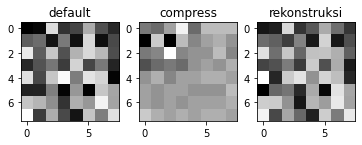

In [114]:
plt.subplot(1,3,1)
plt.title("default")
plt.imshow(im, cmap='gray')
plt.subplot(1,3,2)
plt.title("compress")
plt.imshow(B, cmap='gray')
plt.subplot(1,3,3)
plt.title("rekonstruksi")
plt.imshow(F, cmap='gray')